# Pymaceuticals Inc.
---

### Analysis

1. On the summary statistics we can capture that there are 10 different drug regimens. Out of this we can see that Ketapril has the highest median and total volume out of all the other drugs.
2. In reference to the bar we can see that Capomulin ha the highest mouse timepoints, along with Ramicane and most of the mice used for this analysis were male 
3. Capolmulin was used to treat Mouse ID l509 and the tumor volume seems to decrease with time. 

 

In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how = 'outer', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [193]:
# Checking the number of mice.
total_mice = len(merged_data_df["Mouse ID"].unique())
print (total_mice)


249


In [194]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ID =merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [195]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df["Mouse ID"]==duplicated_mice_ID[0]]
duplicated_mice_ID_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [196]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)
analysis_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [197]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(analysis_data_df['Mouse ID'].unique())
total_mice

248

## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Assemble the resulting series into a single summary DataFrame.
mean = analysis_data_df["Tumor Volume (mm3)"].groupby(analysis_data_df["Drug Regimen"]).mean()
median = analysis_data_df["Tumor Volume (mm3)"].groupby(analysis_data_df["Drug Regimen"]).median()
variance = analysis_data_df["Tumor Volume (mm3)"].groupby(analysis_data_df["Drug Regimen"]).var()
standard_deviation = analysis_data_df["Tumor Volume (mm3)"].groupby(analysis_data_df["Drug Regimen"]).std()
sem = analysis_data_df["Tumor Volume (mm3)"].groupby(analysis_data_df["Drug Regimen"]).sem()

summary_of_analyzed_df = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,
                                       "Tumor Volume Variance":variance,"Tumor Volume Std. Dev.":standard_deviation,
                                       "Tumor Volume Std. Err.":sem})
summary_of_analyzed_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [199]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation_df = analysis_data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 
                                                                    'median', 'var', 'std', 'sem'])
summary_aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

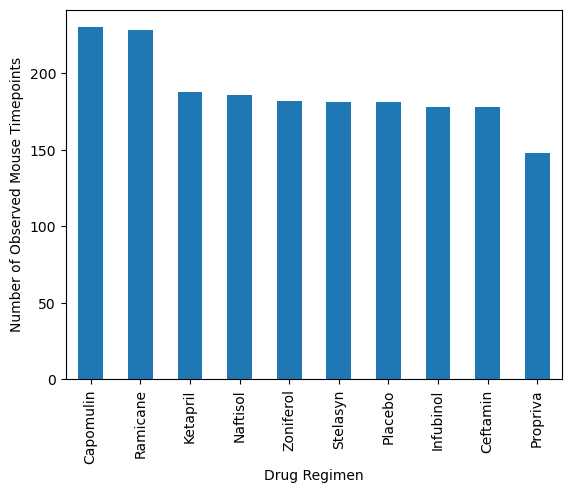

In [200]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_of_rows = analysis_data_df["Drug Regimen"].value_counts()
number_of_rows.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

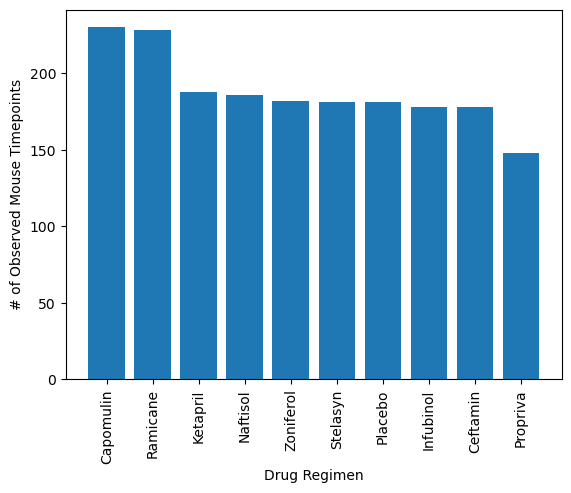

In [201]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice= number_of_rows.values
drugs= number_of_rows.index
plt.bar(drugs, mice, color="tab:blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

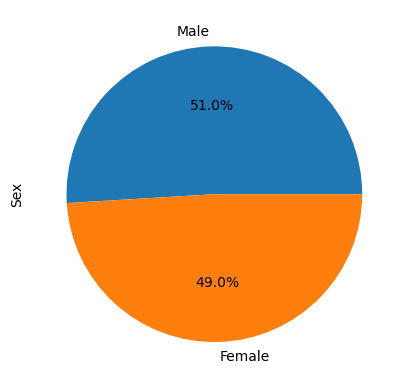

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = analysis_data_df["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

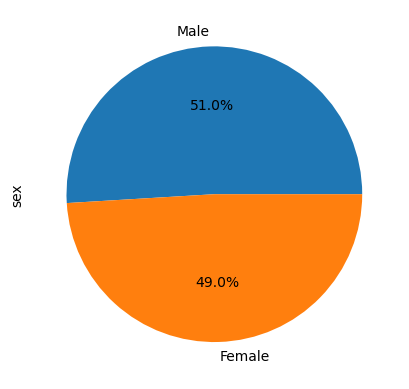

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
amount = gender.values
labels = gender.index
colors = ["tab:blue", "tab:orange"] 
plt.pie(amount, labels=labels, colors=colors,autopct= "%1.1f%%")
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = analysis_data_df.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_group = pd.merge(final_tumor_volume,analysis_data_df , how="left",  on=["Mouse ID", "Timepoint"])
merged_group



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [210]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in regimen:
    Tumor_volume_number = merged_group.loc[merged_group["Drug Regimen"] == name ,'Tumor Volume (mm3)']


    # Locate the rows which contain mice on each drug and get the tumor volumes

    #for name in treatment_names: 
     
    # add subset 
    quartiles = Tumor_volume_number.quantile([0.25,0.5,0.75])
    
    lower_quartile = quartiles[0.25]
    
    upper_quartile = quartiles[0.75]
   
    
    Interquartile_range = upper_quartile-lower_quartile     
    
    average = Tumor_volume_number.mean()
    
    upper_bond = upper_quartile + (1.5*Interquartile_range)
    lower_bond = lower_quartile - (1.5*Interquartile_range)

    
    outliers= Tumor_volume_number.loc[(Tumor_volume_number < lower_bond)| (Tumor_volume_number > upper_bond)]
    
    print(f"{name} Regimen")
    print(f"{name}'s potential outliers:{round(lower_bond,2)}, {name}: Final tumor volume(mm3)")
    print(f"{name}'s potential outliers:{round(upper_bond,2)}, {name}: Final tumor volume(mm3)")
    print(f"Average tumor volume(mm3) for {name} is :{round(average,2)}")
    print(f"Number of outliers for {name} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print("_________________________________________\n")

Capomulin Regimen
Capomulin's potential outliers:20.7, Capomulin: Final tumor volume(mm3)
Capomulin's potential outliers:51.83, Capomulin: Final tumor volume(mm3)
Average tumor volume(mm3) for Capomulin is :36.67
Number of outliers for Capomulin is: 0
_________________________________________

Ramicane Regimen
Ramicane's potential outliers:17.91, Ramicane: Final tumor volume(mm3)
Ramicane's potential outliers:54.31, Ramicane: Final tumor volume(mm3)
Average tumor volume(mm3) for Ramicane is :36.19
Number of outliers for Ramicane is: 0
_________________________________________

Infubinol Regimen
Infubinol's potential outliers:36.83, Infubinol: Final tumor volume(mm3)
Infubinol's potential outliers:82.74, Infubinol: Final tumor volume(mm3)
Average tumor volume(mm3) for Infubinol is :58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
_________________________________________

Ceftamin Regimen
Ceftamin's potential outliers:25.36, Ceftamin: Final tumor vol

In [206]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

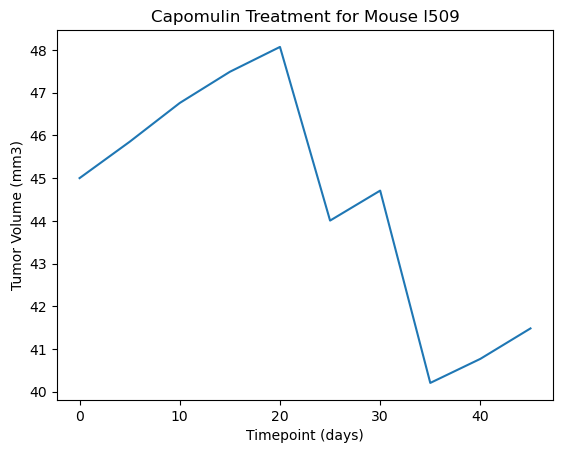

In [207]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'

mouse_df = capomulin_mice_df.loc[capomulin_mice_df['Mouse ID'] == mouse_id]
volume_vs_time = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

plt.title(f"Capomulin Treatment for Mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

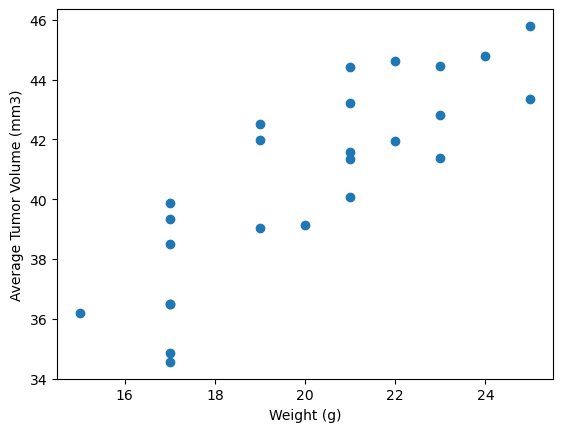

In [208]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = capomulin_mice_df.groupby('Mouse ID')

avg_mice_weight = capomulin['Weight (g)'].mean()
avg_mice_tumor_volume = capomulin['Tumor Volume (mm3)'].mean()

plt.scatter(avg_mice_weight,avg_mice_tumor_volume)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


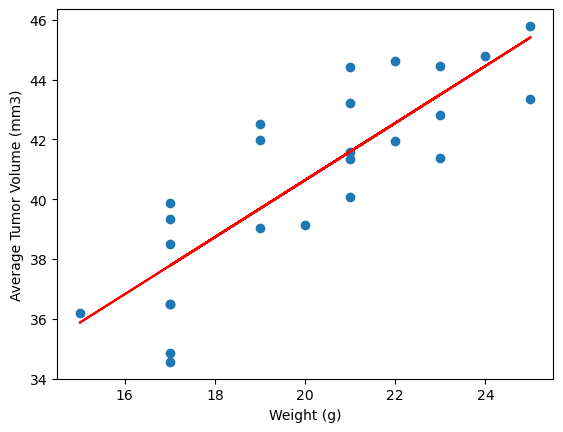

In [209]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_mice_weight
y_values = avg_mice_tumor_volume

correlation_coefficient = round(st.pearsonr(x_values, y_values)[0],2)

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()